<font color=Red><h1>Introcution </h1> </font>

Before starting any project, we need to have clear thoughts about what we are trying to accomplish. It is highly important to understand all the project requirements from a business perspective, convert those requirements to a data science problematic and then prepare a project plan.


<font color=blue><h1> Chapter1: Business Objectives </h1> </font>

In general, the first step in every project is to find out our customer’s needs and achieve them.
This step is aimed at defining the business objectives of the bank :
- Keeping the efficiency of verification process of amounts :
- Increasing the validation accuracy
- Avoid human related errors
- Reduce processing time
- Auto detecting fraud attempts.

<font color=blue><h1> Chapter2: Data Science Objectives </h1> </font>

We have proposed a mechanism to make the process of bank check verification is
not only fast but also reliable by using deep learning methods and image processing
techniques :

• Manipulate a huge amount of data 

• Assure the security in the process

• Detect the different parts of the check : amount in digits, amount in letters, name,date, ...

• Compare between the amount in numbers and the amount in letters and Ensure that both are identical.

• Automatic-correction of mistaken letters in a cheque in order to reduce the percentage of the ones rejected by the bank.

• Store the corrected extracted information in an Excel File.



<font color=blue><h1>Chapter3: Data Preparation </h1> </font>

One of the most important and time-consuming phases in a data mining project is data preparation. Preparing data could take up 70% of a project's time and effort. Devoting adequate energy to the earlier phases of business understanding and data understanding obviously plays an important role in minimizing this additional cost. We will see how the data will be transformed and prepared

In [6]:
import numpy as np
from random import randint
from PIL import Image
import pandas as pd
import cv2 as cv
import os
import warnings
warnings.filterwarnings('ignore')
import shutil
from random import randint

In [11]:
origine_image = cv.imread('C:/Users/Admin/Desktop/Projet_DS/Gen Algo/res/000000.png')
print(origine_image.shape)

(1079, 2365, 3)


Initially we generated very high dimensional images (1079, 2365) and they have several colors. We need to biniarise it to eliminate unnecessary information and reduce pixels.


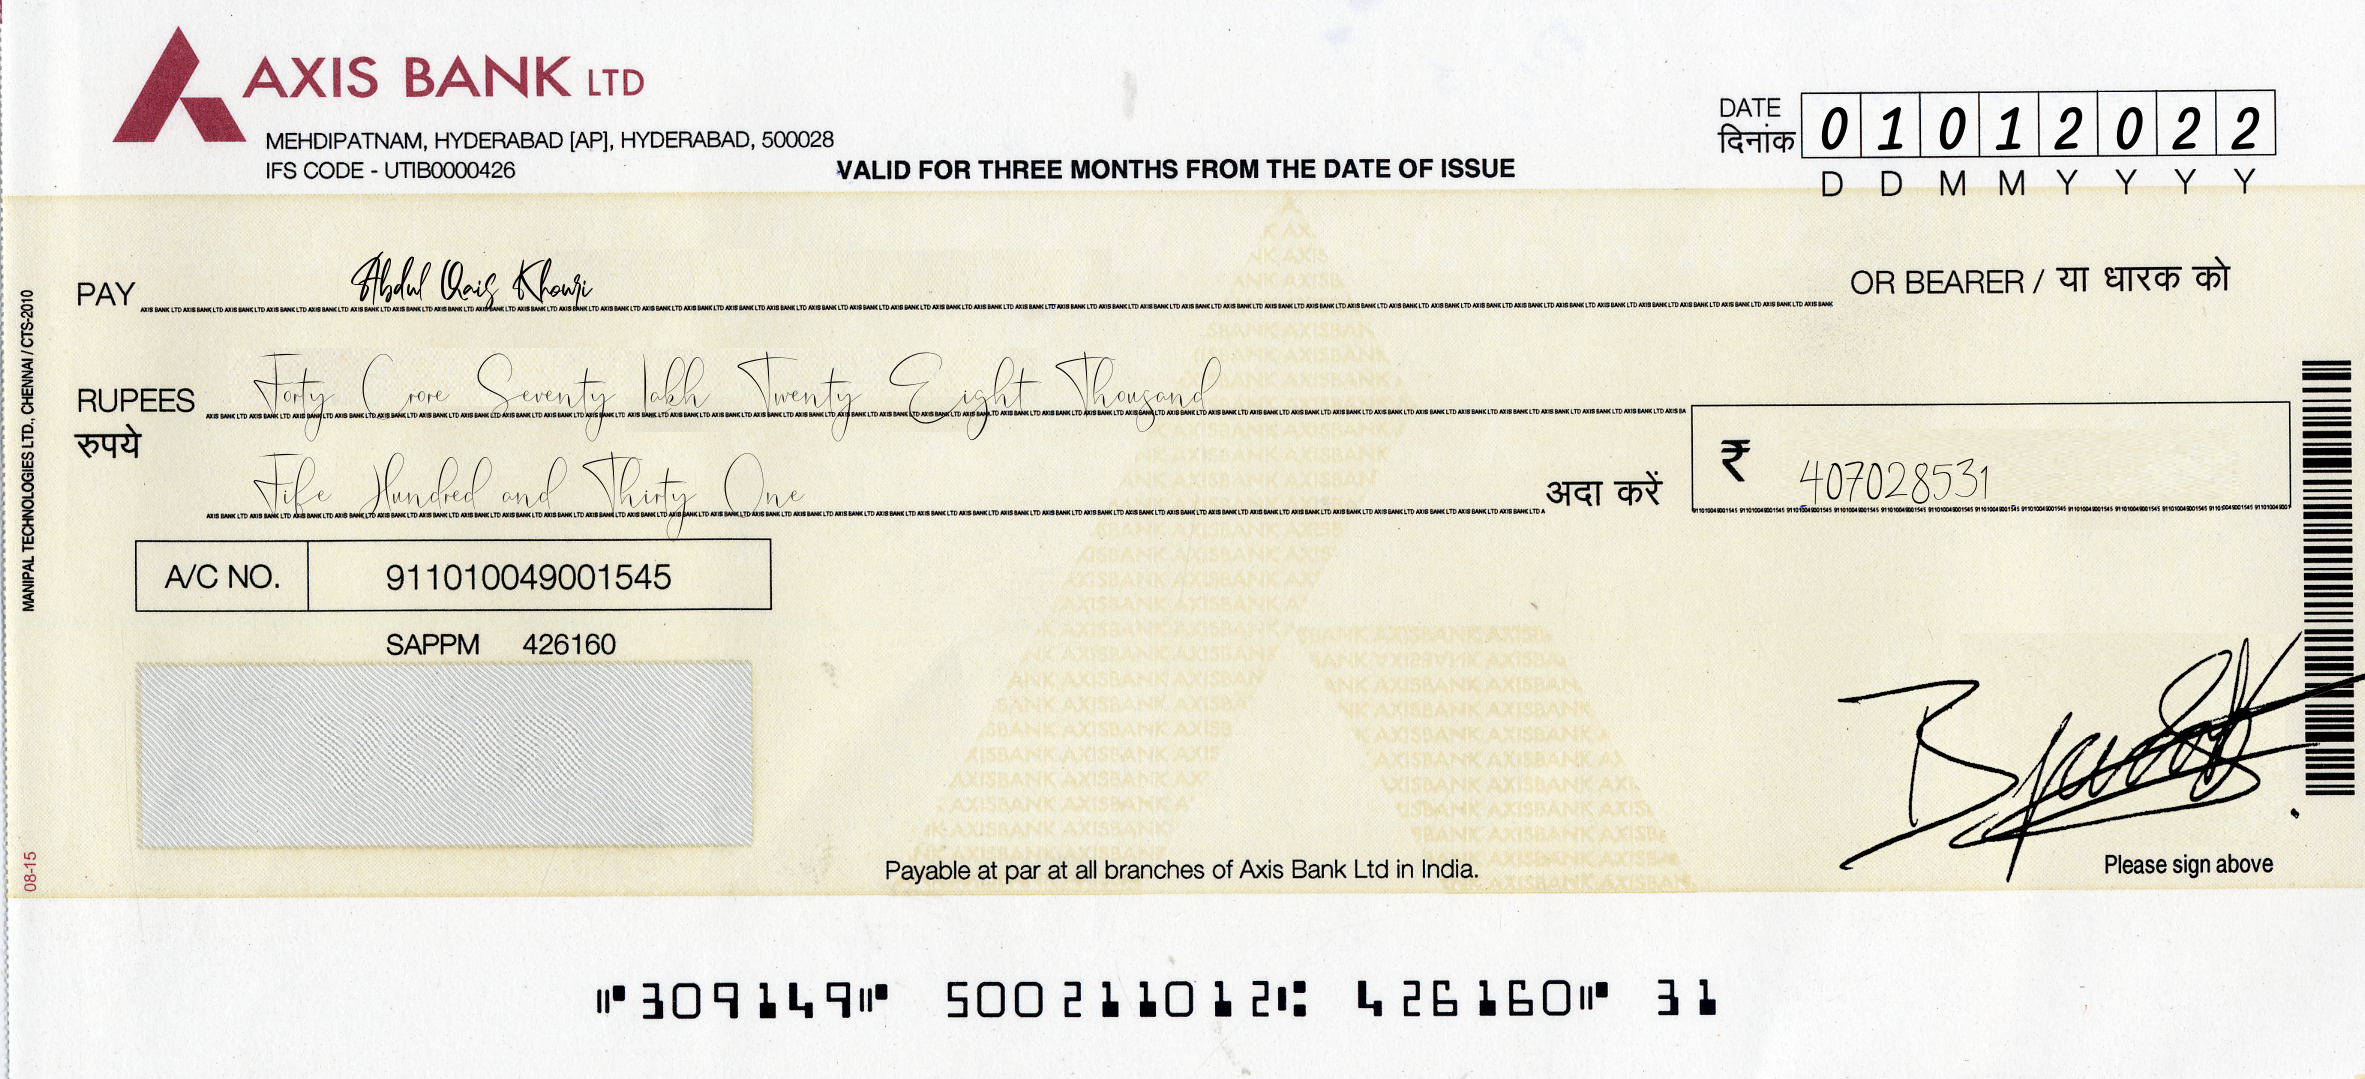

* **GrayScale image** is the process of converting an image from other spaces colorimetric(RGB,CMYK,etc..) in shades of gray.
* **Image denoising** refers to the process of reconstructing a signal from noisy images. Denoising is done to remove unwanted noise from the image in order to analyze it in a better form.
* **Resize image** we have represented our data in a few dimensions, which reduces the cost in memory space as well as the computation time.


In [22]:
# data preprocessing : (resize,grayscale,remove noise)
def prepImg(img,index):
    aa = Image.open(img)
    aa = aa.resize((512, 256)) # shape of image
    gaa = ImageOps.grayscale(aa)
    pixa = np.array(gaa.getdata()).reshape(aa.size[0], aa.size[1], 1)
    flatPix = pixa.flatten()

    for i in np.arange(0,aa.size[0]):
        for j in np.arange(0,aa.size[1]):
            if pixa[i][j]>170:
                pixa[i][j]=255     
    pixa = pixa.flatten()
    pixa = np.reshape(pixa, (256, 512))
    dt = Image.fromarray((pixa).astype(np.uint8))
    dt1 = ImageEnhance.Sharpness(dt)
    index = str(index)
    for i in np.arange(0,6-len(index)):
        index = "0"+index
    dt1.enhance(2).save("path/"+index+".jpg")

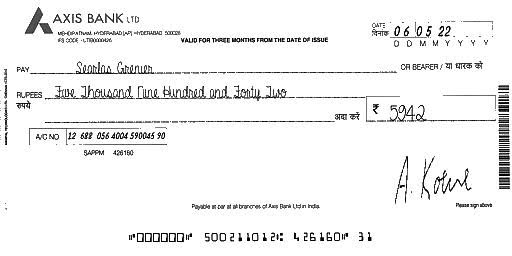 

In [24]:
output_image = cv.imread('C:/Users/Admin/Desktop/data2/train/000000.jpg')
print(output_image.shape)

(256, 512, 3)


In [ ]:
#apply the treatment on the file
import os
path="path/"
files = os.listdir(path) #a list containing the names of the entries in the directory given by path

index = 0
for f in files:
#for i in np.arange(0,4):
    if (f[-3:] != "csv"):
        f = path+f
        prepImg(f,index)
        index=index+1


<font color=Red><h1>Detection and segmentation</h1> </font>

During this phase we wanted to segment our dat .
First of all we labled the data by generating label files mentionning 5 classes which are : 
* 0 : name
* 1: amount in letters
* 2: amount in letters 2 
* 3: amount in digits 
* 4: date
* 5: signature 

Which we provided as of the coordinates of the boxes for each class
As a start we generated an important amount of data based on 10 check types having different positions of our target fields
then we created a function that will assign random values between the min and the max 

In [15]:
# the min max values of each class and for each type of check
chaqueValues=[
#Axis
[[5,13],[50,57],[248,506],[80,82],[5,12],[82,83],[342,392],[107,112],[5,31],[104,107],[364,366],[128,129],
[340,369],[6,21],[490,508],[47,49],[366,366],[96,97],[464,507],[120,128],[335,377],[131,142],[495,506],[218,229],],
#Agricole
[[4,5],[99,99],[218,367],[121,125],[4,5],[40,44],[371,402],[68,68],[6,7],[75,80],[243,347],[97,97],
[377,383],[139,141],[490,497],[160,161],[407,410],[65,66],[485,495],[110,111],[365,381],[162,162],[498,498],[234,242],],
#Banque
[[1,1],[95,95],[207,375],[114,116],[1,1],[40,42],[327,405],[64,67],[3,7],[74,74],[286,374],[90,94],[360,368],[130,130],[485,509],[150,156],
 [380,382],[74,75],[501,507],[110,114],[5,14],[122,128],[166,172],[204,204],],
#Canara
[[14,14],[45,93],[208,505],[69,75],[11,13],[70,71],[346,399],[99,102],[12,14],[93,100],[365,399],[123,123],
[346,361],[15,15],[495,506],[41,42],[363,364],[87,88],[471,503],[118,121],[340,364],[123,140],[497,509],[217,217],],
#HSBC
[[12,12],[70,71],[216,377],[96,100],[13,14],[100,104],[256,381],[131,136],[13,13],[135,140],[216,382],[162,169],
[383,389],[40,40],[467,508],[61,63],[397,397],[93,96],[482,507],[125,130],[382,386],[133,135],[505,509],[204,223],],
#ICICI
[[4,10],[48,51],[247,452],[73,76],[4,11],[72,73],[350,397],[100,106],[3,10],[99,101],[328,397],[120,127],
[376,385],[10,15],[490,507],[44,50],[366,367],[90,92],[478,505],[119,120],[358,376],[128,140],[507,512],[224,226],],
#Saudi
[[7,10],[84,88],[274,398],[110,116],[4,6],[110,113],[352,397],[130,135],[6,20],[136,136],[353,397],[158,158],
[361,367],[5,7],[480,508],[25,30],[398,401],[112,112],[497,506],[142,152],[6,10],[151,157],[137,166],[224,228],],
#Attijari
[[4,5],[95,101],[407,422],[118,122],[4,5],[57,59],[367,500],[78,80],[4,5],[79,80],[376,416],[98,106],
[410,415],[112,116],[490,499],[130,135],[313,315],[5,12],[428,502],[40,48],[348,364],[137,138],[490,499],[208,239],],
#Biat
[[8,14],[58,60],[360,401],[85,87],[6,13],[129,129],[356,377],[148,150],[16,26],[151,151],[352,375],[171,174],
[13,16],[177,178],[102,113],[231,246],[378,381],[130,132],[485,512],[166,177],[119,132],[173,178],[233,253],[245,247],],
#Universelle
[[18,20],[151,151],[304,328],[172,181],[9,12],[95,99],[319,327],[122,129],[7,8],[122,126],[320,328],[149,153],
[347,370],[109,113],[479,510],[144,148],[357,365],[42,45],[478,490],[87,104],[171,185],[183,184],[301,322],[232,249]]
]

In [20]:
#assign random values between min and max boxes
random = 0
array = [["img_name","name","montant en lettre","montant en lettre2","date","montant en chiffre","signature"]]

#33/60/399/82 minName
#30/46/400/85 maxName
#44/84/351/126 minLettre
#44/79/401/129 maxLettre

#xmin/ymin/xmax/ymax minLettre2
#xmin/ymin/xmax/ymax maxLettre2
#xmin/ymin/xmax/ymax minDate
#xmin/ymin/xmax/ymax maxDate
#xmin/ymin/xmax/ymax minChiffre
#xmin/ymin/xmax/ymax maxChiffre
#xmin/ymin/xmax/ymax minSignature
#xmin/ymin/xmax/ymax maxSignature

c = []
for n in np.arange(0,10): #loop over all cheques types

    c = chaqueValues[n] 
    
    
    for f in np.arange(0,1000):
        innerArray = [f,[32,52,400,84],[44,81,370,128],[44,81,370,128],[389,22,496,38],[367,95,496,120],[362,140,495,210]] 
        for j in np.arange(1,7):
            innerArray[j][0]=(randint(c[0+(j-1)*4][0],c[0+(j-1)*4][1])+randint(c[2+(j-1)*4][0],c[2+(j-1)*4][1]))/2
            innerArray[j][1]=(randint(c[1+(j-1)*4][0],c[1+(j-1)*4][1])+randint(c[3+(j-1)*4][0],c[3+(j-1)*4][1]))/2
            innerArray[j][2]=randint(c[2+(j-1)*4][0],c[2+(j-1)*4][1])-randint(c[0+(j-1)*4][0],c[0+(j-1)*4][1])
            innerArray[j][3]=randint(c[3+(j-1)*4][0],c[3+(j-1)*4][1])-randint(c[1+(j-1)*4][0],c[1+(j-1)*4][1])
        array.append(innerArray)
        
        string=""
        string = str(f+n*1000)
        for j in np.arange(0,6-len(string)):
            string = "0"+string
        
        fi= open("C:/Users/Admin/Desktop/box_zone/"+string+".txt","w+") # fill the txt files with the coordinates of the boxes
        for k in np.arange(1,7): #indice du classe
            string = str(k-1)
            for m in np.arange(0,4):
                string = string+" "+str(innerArray[k][m]/(384+((-1)**m)*128))
            fi.write("%s\r" % string)
        fi.close()   

In [21]:
arr = np.asarray(array)
pd.DataFrame(arr).to_csv('sample.csv') 

In [29]:
import os
files = os.listdir("C:/Users/Admin/Desktop/data")

name = r"C:/Users/Admin/Desktop/data/"
for f in files:
    os.rename(name + f,name + f[:6]+"a"+f[6:])

In [31]:
#for each check image we create a txt file 
files = os.listdir("C:/Users/Admin/Desktop/data")
path = r"C:/Users/Admin/Desktop/data/"

string=""
index = 0
for i in np.arange(0,1000):
    for j in np.arange(0,10):
        for k in np.arange(0,2):
            string = str(index)
            for n in np.arange(0,6-len(string)):
                string = "0"+string
            
            if (k == 0):
                os.rename(path + files[(i+j*1000)*2+k],path + string + ".jpg")  
            else:
                os.rename(path + files[(i+j*1000)*2+k],path + string + ".txt")
        index=index+1

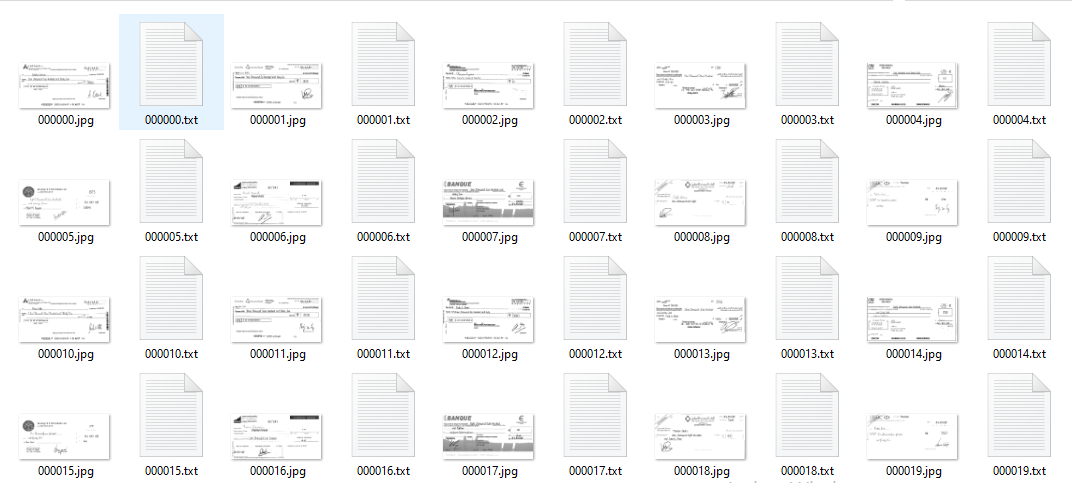

After having generated the checks and their txt file we divided this folder into two parts train test and validation folder


In [19]:
#diviser les 6 premier type de chéques dans le dossier train et le reste dans valid w test
path = r"C:/Users/Admin/Desktop/DATA/" #dossier source
train = r"C:/Users/Admin/Desktop/train/"
test = r"C:/Users/Admin/Desktop/test/"
validation = r"C:/Users/Admin/Desktop/validation/"

files = os.listdir(path)

i = 0
for f in files: 
    if (i<12000):
        shutil.move(path + f, train + f)
    elif (i<16000 and i>=12000):
        shutil.move(path + f, test + f)
    else:
        shutil.move(path + f, validation + f)
    i = i+1

print("training images are : ",len(os.listdir(train)))
print("test images are : ",len(os.listdir(test)))
print("validation images are : ",len(os.listdir(validation)))

training images are :  12000
test images are :  4000
validation images are :  4001


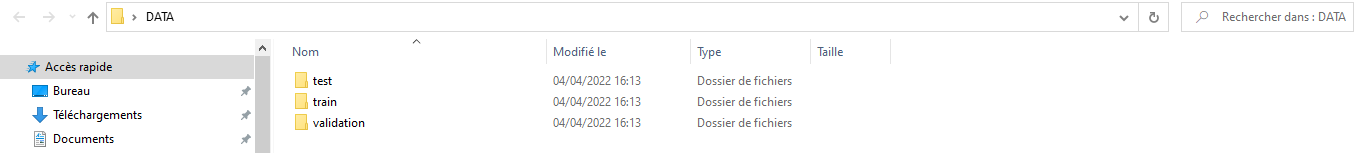

In [13]:
print("training images are : ",len(os.listdir(path)))

training images are :  12000


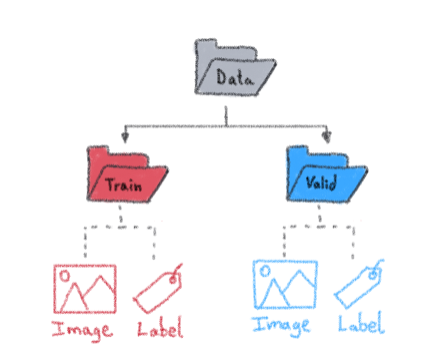

Our data is ready now to train it in the **yolov5**
<font color=Red><h4>What is YOLOv5</h4> </font>
* YOLOV5 an acronym for 'You only look once', is an object detection algorithm that divides images into a grid system. Each cell in the grid is responsible for detecting objects within itself.
* YOLOV5 is one of the most famous object detection algorithms due to its speed and accuracy.


To train the YOLOv5 model, we need to add a .yaml file to describe the parameters of our dataset.
* We have to specify the train and validation files.
* we define number and names of classes

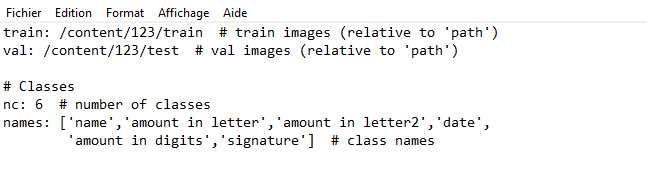

In [ ]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '/home/mohamed-ali/yolov5/cheque_data/images/train',
    val = '/home/mohamed-ali/yolov5/cheque_data/images/validation',
    nc = 6,
    names = ["name", "montant en lettre", "montant en lettre2", "date", "montant en chiffre", "signature"]
)

data_augmentation_yaml = dict(
    
lr0 = 0.001,  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf =  0.1,  # final OneCycleLR learning rate (lr0 * lrf)
momentum = 0.937,  # SGD momentum/Adam beta1
weight_decay = 0.0005,  # optimizer weight decay 5e-4
warmup_epochs = 3.0,  # warmup epochs (fractions ok)
warmup_momentum = 0.8,  # warmup initial momentum
warmup_bias_lr = 0.1,  # warmup initial bias lr
box = 0.05,  # box loss gain
cls = 0.3,  # cls loss gain
cls_pw = 1.0,  # cls BCELoss positive_weight
obj = 0.7,  # obj loss gain (scale with pixels)
obj_pw = 1.0,  # obj BCELoss positive_weight
iou_t = 0.20,  # IoU training threshold
anchor_t = 4.0,  # anchor-multiple threshold
# anchors: 3,  # anchors per output layer (0 to ignore)
fl_gamma = 0.0,  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h = 0,  # image HSV-Hue augmentation (fraction)
hsv_s = 0,  # image HSV-Saturation augmentation (fraction)
hsv_v = 0,  # image HSV-Value augmentation (fraction)
degrees = 0.0,  # image rotation (+/- deg)
translate = 0.1,  # image translation (+/- fraction)
scale = 0.9,  # image scale (+/- gain)
shear = 0.0,  # image shear (+/- deg)
perspective = 0.0,  # image perspective (+/- fraction), range 0-0.001
flipud = 1.,  # image flip up-down (probability)
fliplr = 1.,  # image flip left-right (probability)
mosaic = 1.0,  # image mosaic (probability)
mixup = 0.3 , # image mixup (probability)
copy_paste = 0.1  # segment copy-paste (probability)
)

In [ ]:
python train.py --img 416 --batch 32 --epochs 10 --hyp cfg.yaml --weights yolov5s.pt --cache --optimizer "Adam" --label-smoothing 0.0001 

In [ ]:
python detect.py --source C:/Users/Admin/Desktop/resultat_yolo --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --save-txt --save-conf

<font color=Green><h3>Result of yolov5</h3> </font>

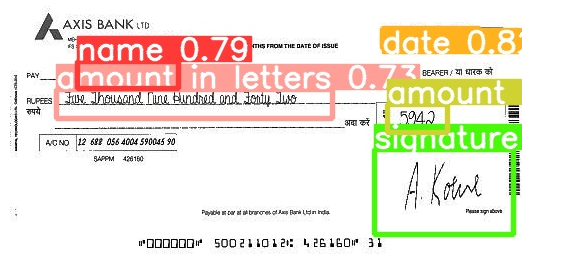

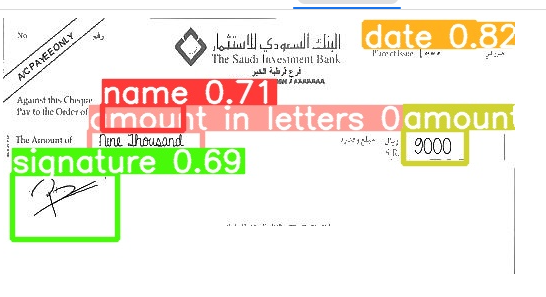

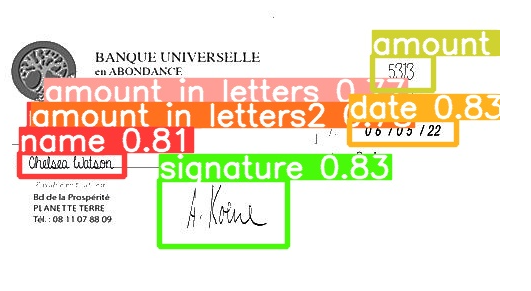

<font color=Red><h1>Cropping Images</h1> </font>

In [55]:
#Conversion format yolo txt file en une liste python 
def YPConversion (file,path):
    outerArray = [] #table des classes d'un fichier
    with open(path + file) as f:
        lines = f.readlines()
    s = ""
    innerArray = []
    for i in np.arange(0,6): #boucle sur les classes
        innerArray = []
        s = ""
        flag = False
        for j in np.arange(0,len(lines[i])):
            s = s + lines[i][j] #valeur du coord
            if (lines[i][j] == " "):
                if (flag == True):
                    innerArray.append(float(s[:-1]))
                s = ""
                flag = True
        innerArray.append(float(s[:-1]))
        outerArray.append(innerArray)

    OA = np.array(outerArray)
    FOA = OA.flatten()
    return FOA

In [56]:
#Convertir les floats de la liste python en des entiers
def RoundFct(array):
    roundedArray = []
    for i in np.arange(0,6):
        roundedArray.append(int(np.round(array[i*4+0]*512 - array[i*4+2]*512/2)))
        roundedArray.append(int(np.round(array[i*4+1]*256 - array[i*4+3]*256/2)))
        roundedArray.append(int(np.round(array[i*4+0]*512 + array[i*4+2]*512/2)))
        roundedArray.append(int(np.round(array[i*4+1]*256 + array[i*4+3]*256/2)))
    return roundedArray

In [68]:
#Crop-per les images de chaque classe et les sauvegarder sous la format XXXXXX-ClasseName.jpg
def boxCrop(pixels,array,path,file):
    
    #CIP : classImg'Pixels
    #RCIP : reshapedClassImg'Pixels
    #RCIPI : reshapedClassImg'Pixels'Img
    
    for i in np.arange(0,6):
        CIP = []
        for j in np.arange(array[i*4+1],array[i*4+3]):
            for k in np.arange(array[i*4],array[i*4+2]):
                CIP.append(pixels[j*512+k])
        RCIP = np.reshape(CIP, (array[i*4+3] - array[i*4+1], array[i*4+2] - array[i*4]))
        RCIPI = Image.fromarray(RCIP.astype(np.uint8))
        RCIPI.save(path + file[:len(file)-4] + "-" + str(i) + file[len(file)-4:],format="jpeg")
        #RCIPI.save(path + file[:len(file)-4] + "-" + str(i), format = "jpg")

In [69]:
#Fonction main 
yoloPath = "C:/Users/Admin/Desktop/DATA/validation/labels/"
imgsPath = "C:/Users/Admin/Desktop/DATA/validation/"
yoloFiles = os.listdir(yoloPath)
imgsFiles = os.listdir(imgsPath) 

#chemin où les images croppées vont être sauvegarder
destinationPath = "C:/Users/Admin/Desktop/image_cropped/"
    
#YCA : yoloConvertedArray
#RYCA : roundedYoloConvertedArray

for i in np.arange(0,len(yoloFiles)):
    YCA = YPConversion(yoloFiles[i],yoloPath)
    RYCA = RoundFct(YCA)
    img = Image.open(imgsPath + imgsFiles[i])
    pixels = np.array(img.getdata())
    pixels = pixels.flatten()
    boxCrop(pixels,RYCA,destinationPath,imgsFiles[i])